# Exercise 1: Data cleaning

Before doing actual data analysis, we usually first need to clean the data. 
This might involve steps such as dealing with missing values and encoding categorical variables as integers.

Load the Titanic data set in `titanic.csv` and perform the following tasks:

1. Report the number of observations with missing `Age`, for example using [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html).

2. Compute the average age in the data set. Use the following approaches and compare your results:
    1.  Use the [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) method.
    2.  Convert the `Age` column to a NumPy array using [`to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html). Experiment with NumPy's [`np.mean()`](https://numpy.org/doc/2.0/reference/generated/numpy.mean.html) and [`np.nanmean()`](https://numpy.org/doc/2.0/reference/generated/numpy.nanmean.html) to see if you obtain the same results.

3. Replace the all missing ages with the mean age you computed above, rounded to the nearest integer. Convert this updated `Age` column to integer type using [`astype()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

   Note that in "real" applications, replacing missing values with sample means is usually not a good idea. 

4. Generate a new column `Female` which takes on the value one if `Sex` is equal to `"female"` and zero otherwise. 
   This is called an _indicator_ or _dummy_ variable, and is preferrable to storing such categorical data as strings.
   Delete the original column `Sex`.

5. Save your cleaned data set as `titanic-clean.csv` using [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) with `,` as the field separator.
   Tell `to_csv()` to *not* write the `DataFrame` index to the CSV file as it's not needed in this example.

In [85]:
import pandas as pd
# Define the path to the data set
DATA_PATH = '../../data'

# URL to CSV file in GitHub repository
file = f'{DATA_PATH}/titanic.csv'

# Load sample data set of Titanic passengers. Individual fields are separated
# using a comma, which is the default.
df = pd.read_csv(file, sep=',')

In [86]:
# Print the first few rows of the data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


In [87]:
# Report number of observations with missing Age values
missing_age = df['Age'].isna().sum()
print(f'Missing Age values: {missing_age}')

Missing Age values: 177


2.

In [88]:
# Compute the average age
average_age = df['Age'].mean()
print(f'Average age: {average_age:.2f}')

Average age: 29.70


In [89]:
# convert the Age column to a Numpy array, and then compute the mean
import numpy as np

average_age = np.mean(df['Age'].to_numpy())
print(f'Average age: {average_age:.2f}')

average_age = np.nanmean(df['Age'].to_numpy())
print(f'Average age: {average_age:.2f}')



Average age: nan
Average age: 29.70


3.

In [90]:
# Round the average age to the nearest year
average_age = np.round(average_age)
print(f'Average age: {average_age:.0f}')

# Replace missing values with the average age create a new data frame
df['Age'] = df['Age'].fillna(average_age).astype(int)

Average age: 30


4.

In [91]:
# Create a new column which takes the value 1 is Sex  == "female" and 0 otherwise
df['IsFemale'] = (df['Sex'] == 'female').astype(int) 

5.

In [92]:
# Save the cleaned data set as `titanic-clean.csv` using to_csv with , as separator
df.to_csv('titanic-clean.csv', sep=',', index=False)

***
# Exercise 2: Daily returns of US stock market indices

In this exercise, we examine how the three major US stock market indices performed last year using data from Yahoo! Finance.

1. Use the [`yfinance`](https://pypi.org/project/yfinance/) library and its `download()` 
    function to obtain the time series of daily observations for the 
    [S&P 500](https://en.wikipedia.org/wiki/S%26P_500), the 
    [Dow Jones Industrial Average (DJIA)](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) 
    and the 
    [NASDAQ Composite](https://en.wikipedia.org/wiki/Nasdaq_Composite) 
    indices. 
    Restrict the sample to the period from 2024-01-01 to 2024-12-31
    and keep only the closing price stored in column `Close`.

    _Hint_: The corresponding ticker symbols are `^GSPC`, `^DJI`, `^IXIC`, respectively.

2. Rename the DataFrame columns to `'SP500'`, `'Dow Jones'` and `'NASDAQ'` using the 
    [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) 
    method.

    *Hint:* `rename(columns=dict)` expects a dictionary as an argument which maps existing to new column names.

3.  Plot the three time series (one for each index) in a single graph. Label all axes and make sure your graph contains a legend.

    _Hint:_ You can directly use the [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 
    method implemented in `pandas`.

4.  The graph you created in the previous sub-question is not well-suited to illustrate how each index developed in 2024 
    since the indices are reported on vastly different scales (the S&P500 appears to be an almost flat line).

    To get a better idea about how each index fared in 2023 relative to its value at the beginning of the year, normalize each index by its value on the first trading day in 2024 (which was 2024-01-02). Plot the resulting normalized indices.

5.  For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent.
    Create a plot of the daily returns for all indices.

    *Hint:* Use [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to compute the change 
    relative to the previous observation.

In [93]:
import yfinance as yf

from yfinance import download

Symbol1 = '^GSPC'   # S&P 500
Symbol2 = '^DJI'    # Dow Jones Industrial Average
Symbol3 = '^IXIC'   # NASDAQ

start = '2024-01-01'
end = '2024-12-31'

# Download data from Yahoo Finance
data = download([Symbol1, Symbol2, Symbol3], start=start, end=end, auto_adjust = True)

# Only keep the close price
data = data['Close']

[**********************67%*******                ]  2 of 3 completed

[*********************100%***********************]  3 of 3 completed


2.


In [94]:
# Rename '^GSPC' to 'S&P 500', '^DJI' to 'Dow Jones', and '^IXIC' to 'NASDAQ'
data = data.rename(columns={'^GSPC': 'S&P 500', '^DJI': 'Dow Jones', '^IXIC': 'NASDAQ'})
data.head()


Ticker,Dow Jones,S&P 500,NASDAQ
Date,,,
2024-01-02,37715.039062,4742.830078,14765.940430
2024-01-03,37430.191406,4704.810059,14592.209961
2024-01-04,37440.339844,4688.680176,14510.299805
2024-01-05,37466.109375,4697.240234,14524.070312
2024-01-08,37683.011719,4763.540039,14843.769531


3.

<Axes: title={'center': 'Stock Market Indices'}, xlabel='Date', ylabel='Price'>

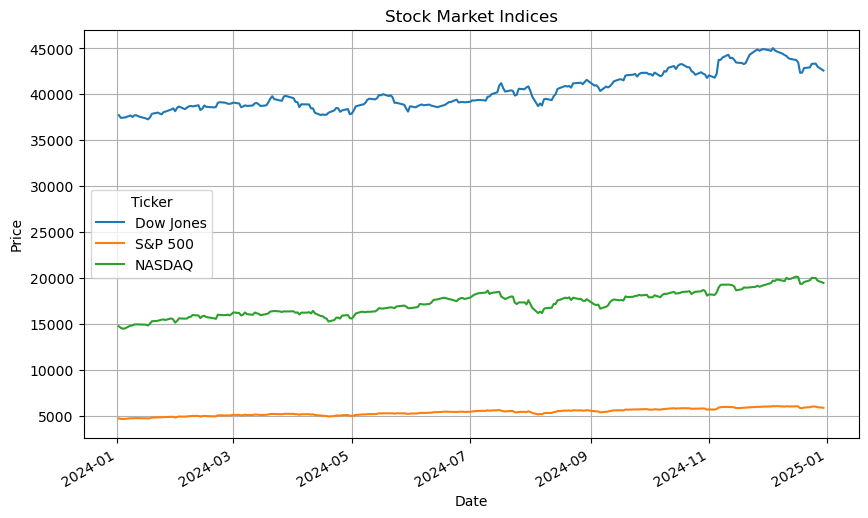

In [95]:
# Plot the data for the three indices in a single plot
import matplotlib.pyplot as plt

data.plot(title='Stock Market Indices', 
          ylabel='Price', 
          xlabel='Date', 
          figsize=(10, 6),
          grid=True)


4.

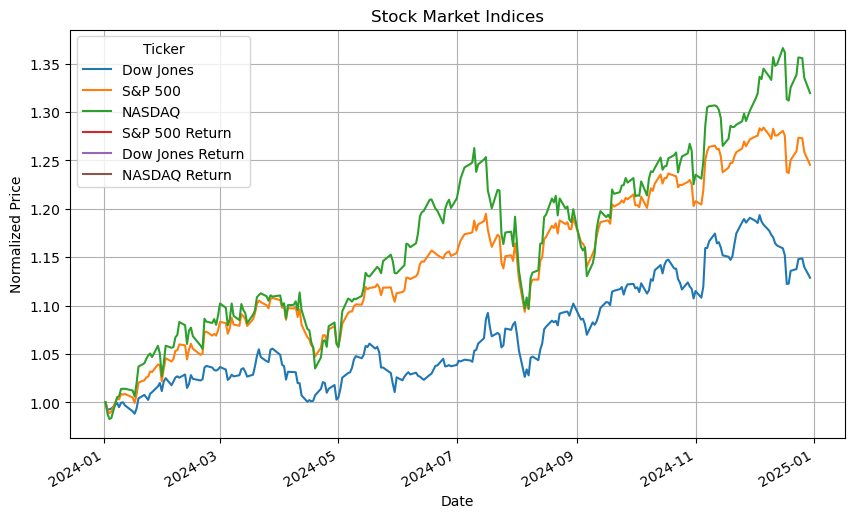

In [101]:
# Plot the data normalized to the first observation
data = data / data.iloc[0]
_ = data.plot(title='Stock Market Indices',
          ylabel='Normalized Price', 
          xlabel='Date', 
          figsize=(10, 6),
          grid=True)

5.

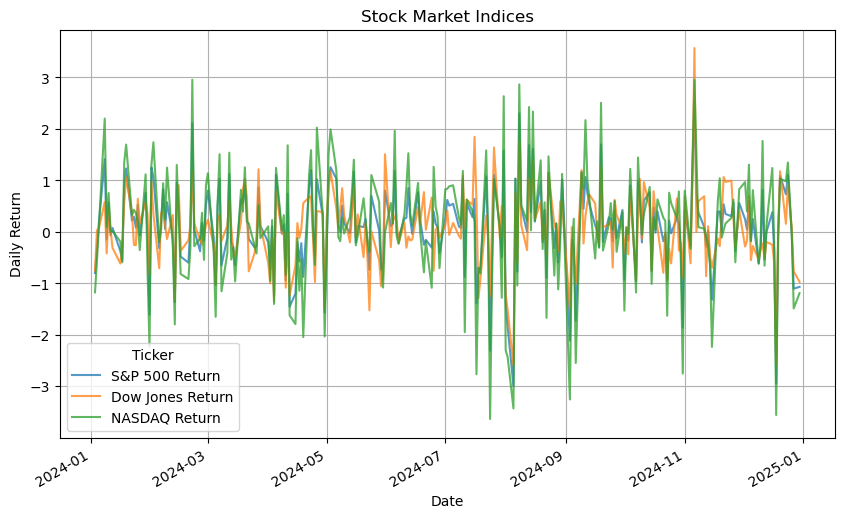

In [105]:
# Create a new column for the daily return of the S&P 500, Dow Jones, and NASDAQ
data['S&P 500 Return'] = data['S&P 500'].pct_change()*100
data['Dow Jones Return'] = data['Dow Jones'].pct_change()*100
data['NASDAQ Return'] = data['NASDAQ'].pct_change()*100

# Plot the daily return of the three indices
_ = data[['S&P 500 Return', 
      'Dow Jones Return', 
      'NASDAQ Return']].plot(title='Stock Market Indices',
                             ylabel='Daily Return',
                             xlabel='Date',
                             figsize=(10, 6),
                             grid=True,
                             alpha=0.75)
